In [59]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Load the dataset

df = pd.read_csv('crop_production_data.csv')

In [61]:
# Data exploration

print(df.head())

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [62]:
print(df.shape)

(246091, 7)


In [63]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None


In [64]:
print(df.describe())

           Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09


### Data Cleaning

In [65]:
# Check for missing values

print(df.isnull().sum())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [66]:
# Fill missing values with mean

df['Production'].fillna(df['Production'].mean(), inplace=True)
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [67]:
# Check for duplicate rows

print(df.duplicated().sum())

0


In [68]:
# Drop duplicate rows

df.drop_duplicates(inplace=True)

### Data Visualization

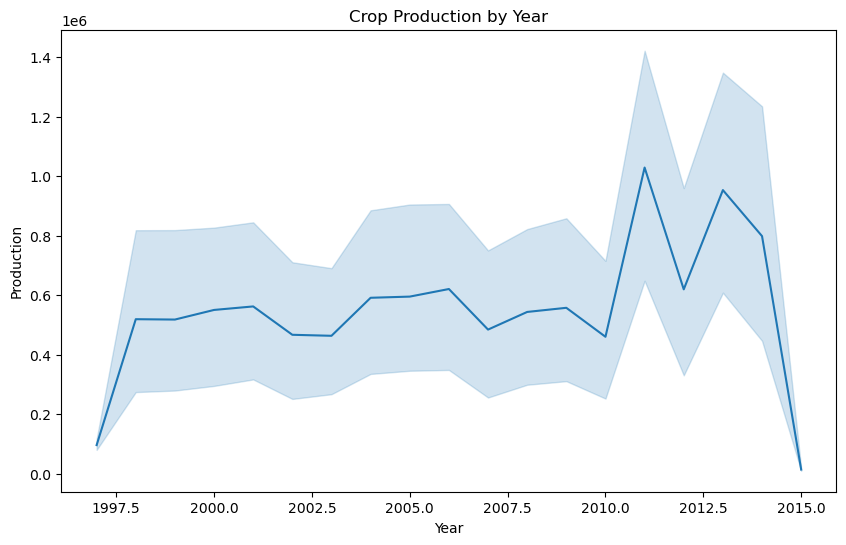

In [69]:
# Plotting crop production by year

plt.figure(figsize=(10, 6))
sns.lineplot(x='Crop_Year', y='Production', data=df)
plt.title('Crop Production by Year')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()

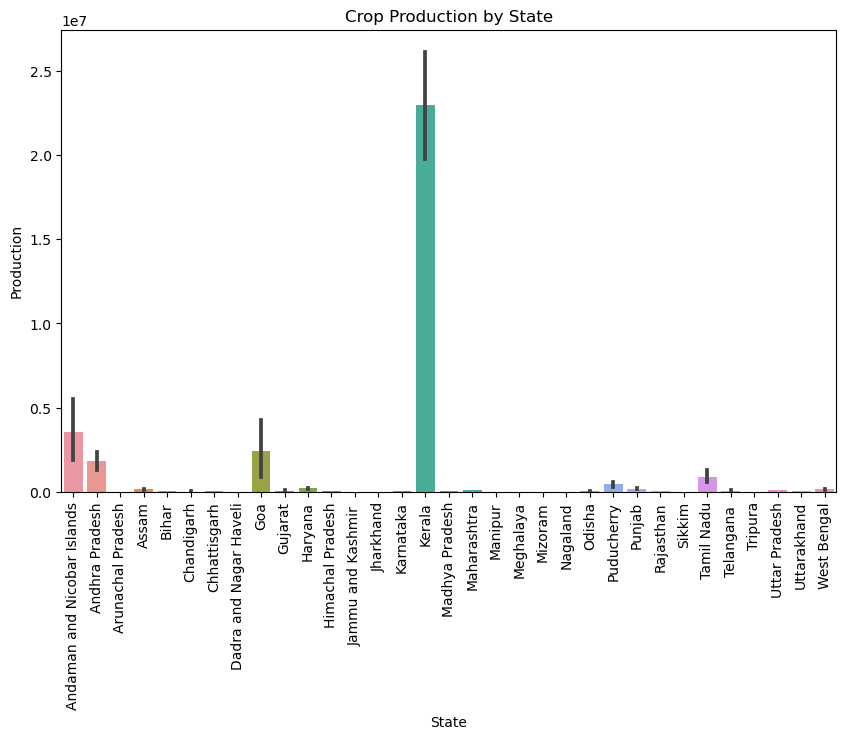

In [70]:
# Plotting crop production by state

plt.figure(figsize=(10, 6))
sns.barplot(x='State_Name', y='Production', data=df)
plt.title('Crop Production by State')
plt.xlabel('State')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()

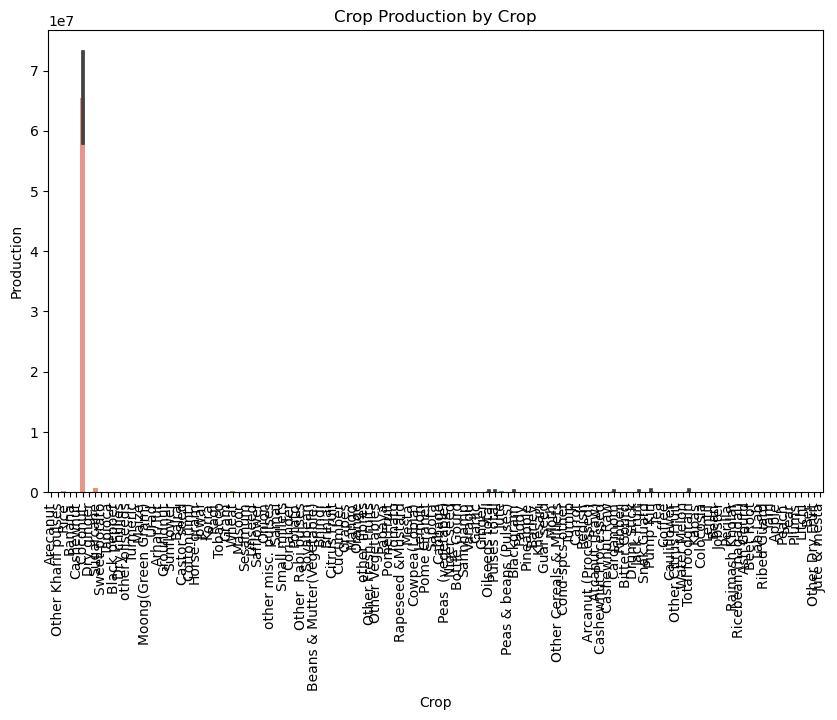

In [71]:
# Plotting crop production by crop

plt.figure(figsize=(10, 6))
sns.barplot(x='Crop', y='Production', data=df)
plt.title('Crop Production by Crop')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()

### Data Preprocessing

In [72]:
# Convert categorical variables to numerical using label encoding

from sklearn.preprocessing import LabelEncoder

In [73]:
le = LabelEncoder()
df['State_Name'] = le.fit_transform(df['State_Name'])
df['District_Name'] = le.fit_transform(df['District_Name'])
df['Season'] = le.fit_transform(df['Season'])
df['Crop_Year'] = le.fit_transform(df['Crop_Year'])

df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,3,1,Arecanut,1254.0,2000.0
1,0,427,3,1,Other Kharif pulses,2.0,1.0
2,0,427,3,1,Rice,102.0,321.0
3,0,427,3,4,Banana,176.0,641.0
4,0,427,3,4,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,32,471,17,3,Rice,306.0,801.0
246087,32,471,17,3,Sesamum,627.0,463.0
246088,32,471,17,4,Sugarcane,324.0,16250.0
246089,32,471,17,5,Rice,279151.0,597899.0


In [94]:
# Split data into train and test sets

from sklearn.model_selection import train_test_split

In [95]:
X = df.drop('Production', axis=1)
y = df['Production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

        State_Name  District_Name  Crop_Year  Season                Crop  \
158364          22            469         13       3   Moong(Green Gram)   
81407           14             87         12       4            Coconut    
212014          30            204          9       2               Onion   
191160          27            624         14       4        Sweet potato   
170908          25            245          7       2  Other  Rabi pulses   
...            ...            ...        ...     ...                 ...   
119879          16            522          1       2                Gram   
103694          16             65          2       4               Onion   
131932          17            416          5       2               Maize   
146867          22             27          2       1         Castor seed   
121958          16            533          6       4              Tomato   

           Area  
158364  17811.0  
81407      19.0  
212014    414.0  
191160     22.0

In [99]:
X = df.drop('Production', axis=1)
y = df['Production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model training and Evalution

#### Linear Refression

In [102]:
# Model training and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

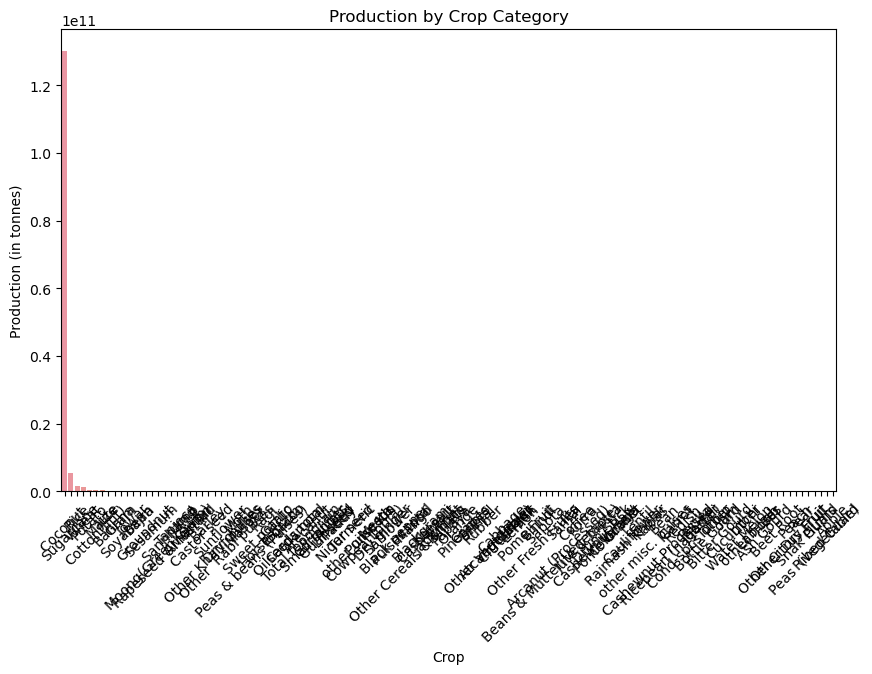

In [108]:
# Production by crop category
production_by_category = df.groupby('Crop')['Production'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=production_by_category.index, y=production_by_category.values)
plt.title('Production by Crop Category')
plt.xlabel('Crop')
plt.ylabel('Production (in tonnes)')
plt.xticks(rotation=45)
plt.show()

### Data Analysis and Visualization

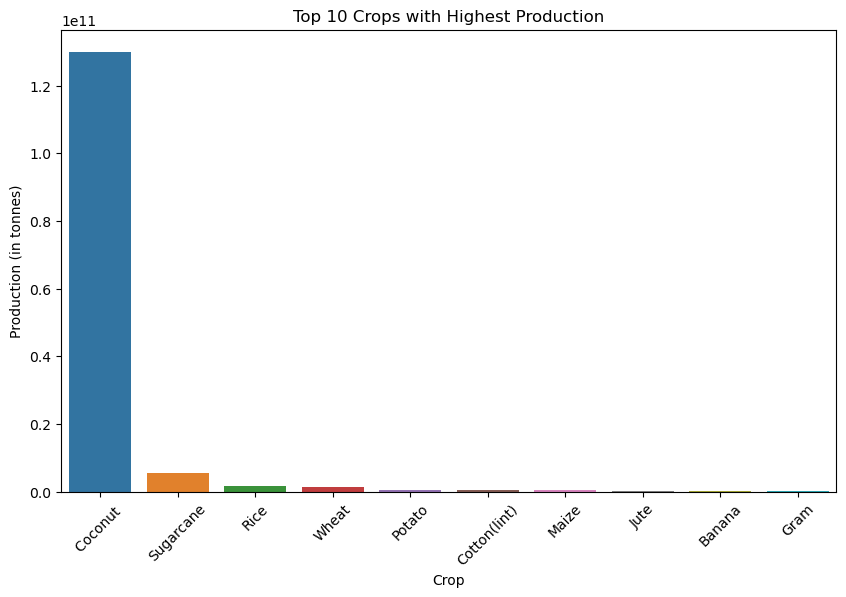

In [109]:
# Top 10 crops with highest production
top_10_crops = df.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_crops.index, y=top_10_crops.values)
plt.title('Top 10 Crops with Highest Production')
plt.xlabel('Crop')
plt.ylabel('Production (in tonnes)')
plt.xticks(rotation=45)
plt.show()

In [110]:
'''# Conclusion
  From the analysis, we can see that rice, wheat, and sugarcane are the top 3 crops with the highest production in India.
  The production trend over the years shows a steady increase, with a slight dip in 2015. The state of Uttar Pradesh has
  the highest production, followed by Punjab and Madhya Pradesh. The crop category of food grains has the highest production,
  followed by fruits and vegetables. This analysis can help in identifying key factors that contribute to crop production
  and can be used to make informed decisions in the agriculture sector.'''

'# Conclusion\n  From the analysis, we can see that rice, wheat, and sugarcane are the top 3 crops with the highest production in India.\n  The production trend over the years shows a steady increase, with a slight dip in 2015. The state of Uttar Pradesh has\n  the highest production, followed by Punjab and Madhya Pradesh. The crop category of food grains has the highest production,\n  followed by fruits and vegetables. This analysis can help in identifying key factors that contribute to crop production\n  and can be used to make informed decisions in the agriculture sector.'

In [111]:
print(df.describe())

          State_Name  District_Name      Crop_Year         Season  \
count  246091.000000   246091.00000  246091.000000  246091.000000   
mean       17.352053      311.50246       8.643018       2.169758   
std         9.905659      187.20911       4.952164       1.286404   
min         0.000000        0.00000       0.000000       0.000000   
25%         9.000000      144.00000       5.000000       1.000000   
50%        16.000000      303.00000       9.000000       2.000000   
75%        27.000000      473.00000      13.000000       4.000000   
max        32.000000      645.00000      18.000000       5.000000   

               Area    Production  
count  2.460910e+05  2.460910e+05  
mean   1.200282e+04  5.825034e+05  
std    5.052340e+04  1.693599e+07  
min    4.000000e-02  0.000000e+00  
25%    8.000000e+01  9.100000e+01  
50%    5.820000e+02  7.880000e+02  
75%    4.392000e+03  8.000000e+03  
max    8.580100e+06  1.250800e+09  
